In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


#Importing the dataset
rawdata = pd.read_csv('heart.csv')

#Reading and understanding the dataset
print("Shape : ", rawdata.shape)

print('Data Info:\n')
print(rawdata.info())

Shape :  (303, 14)
Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [2]:
#Also, there are no null values.

print('Feature count of missing values: \n')
print(rawdata.isnull().sum())

Feature count of missing values: 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [3]:
#Dropping any NaN values if there are any

rawdata = rawdata.dropna(axis=0)
rawdata.loc[151:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
#Understanding the dataset
rawdata.head(10)

#All of the data is numerical, where most are integers with 1 column -
# - 'oldpeak' is a float

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
#Reviewing the data
rawdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#descriptive statistics summary for 'thalach' which is a persons -
# -maximum heart rate achieved.
rawdata['thalach'].describe()

#The average heartrate is 150, with a minimum of 71 and maximum 202 which -
# -is a very large difference as 71 for a maximum heart rate is very low.

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


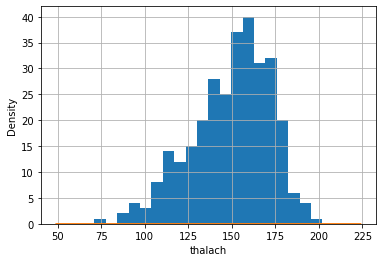

In [7]:
#histogram for 'thalach'

rawdata['thalach'].hist(bins=20)

sns.distplot(rawdata['thalach']);

#this feature is negatively skewed.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


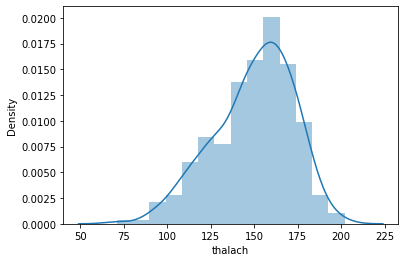

In [8]:
#histogram for 'thalach'

sns.distplot(rawdata['thalach']);

Relationships Between Variabels: 



<function matplotlib.pyplot.show(close=None, block=None)>

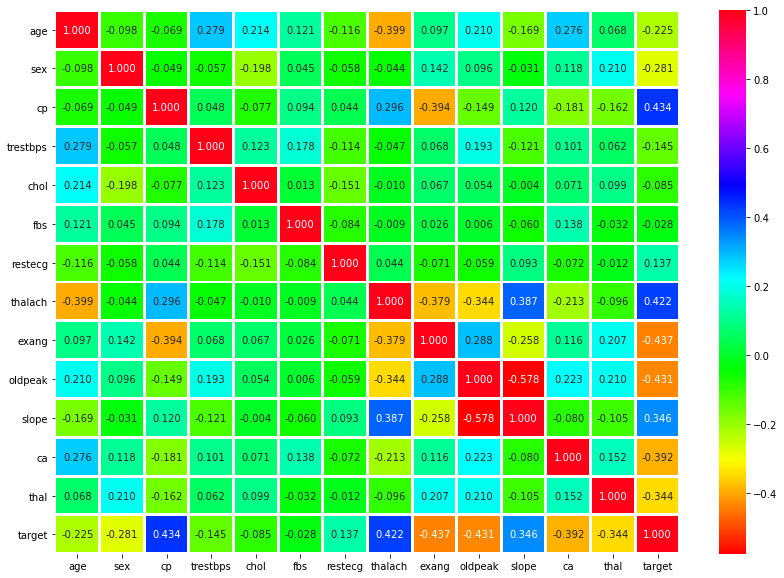

In [9]:
#Finding the feature corelations

print("Relationships Between Variabels: \n")
plt.figure(figsize=(14,10))
sns.heatmap(rawdata.corr(), annot=True, cmap='hsv', fmt='.3f', 
linewidths=2)
plt.show

Text(0.5, 1.0, 'Correlation Between Heart Disease and Ages')

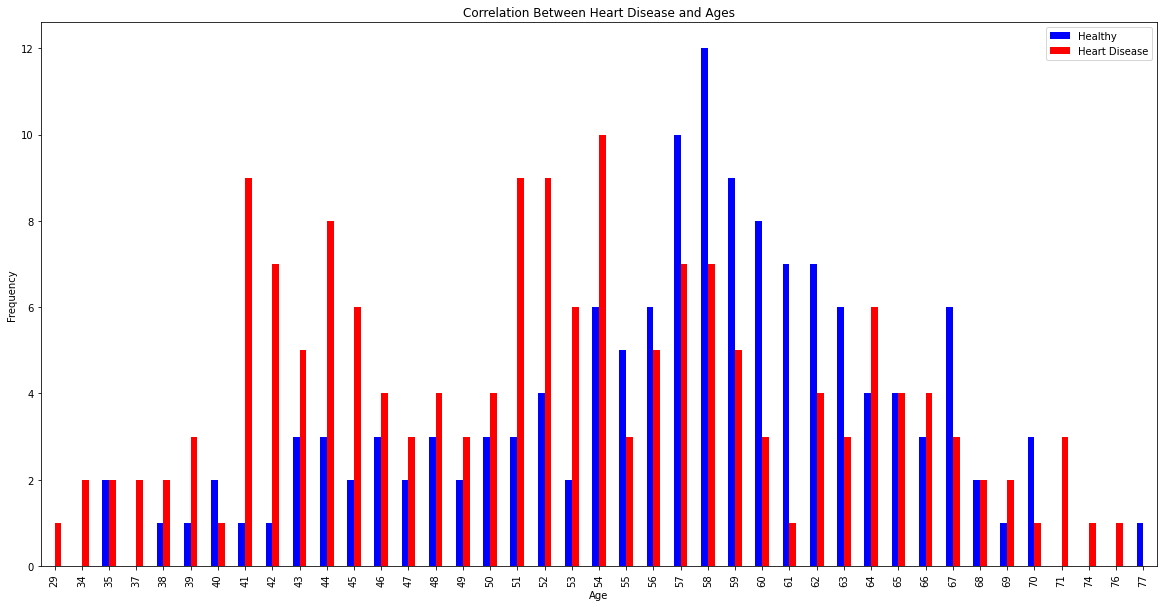

In [10]:
#Correlation between age & target
#Relationship with numerical variables
#barplot age/target
pd.crosstab(rawdata.age,rawdata.target).plot(kind="bar",
figsize=(20,10), color=['blue','red'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Healthy', 'Heart Disease'])
plt.title('Correlation Between Heart Disease and Ages')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


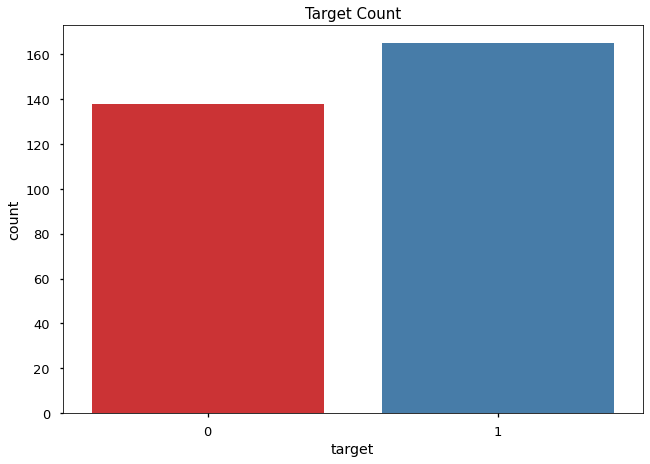

In [11]:
#Plotting the target attribute

plt.rcParams['figure.figsize'] = (18, 8)
plt.style.use('seaborn-talk')
sns.countplot(rawdata['target'], palette = 'Set1')
plt.title('Target Count', fontsize = 15)
# plt.savefig('Target3.png')

plt.show()

Text(0.5, 1.0, 'Correlation Between Heart Disease and Sex')

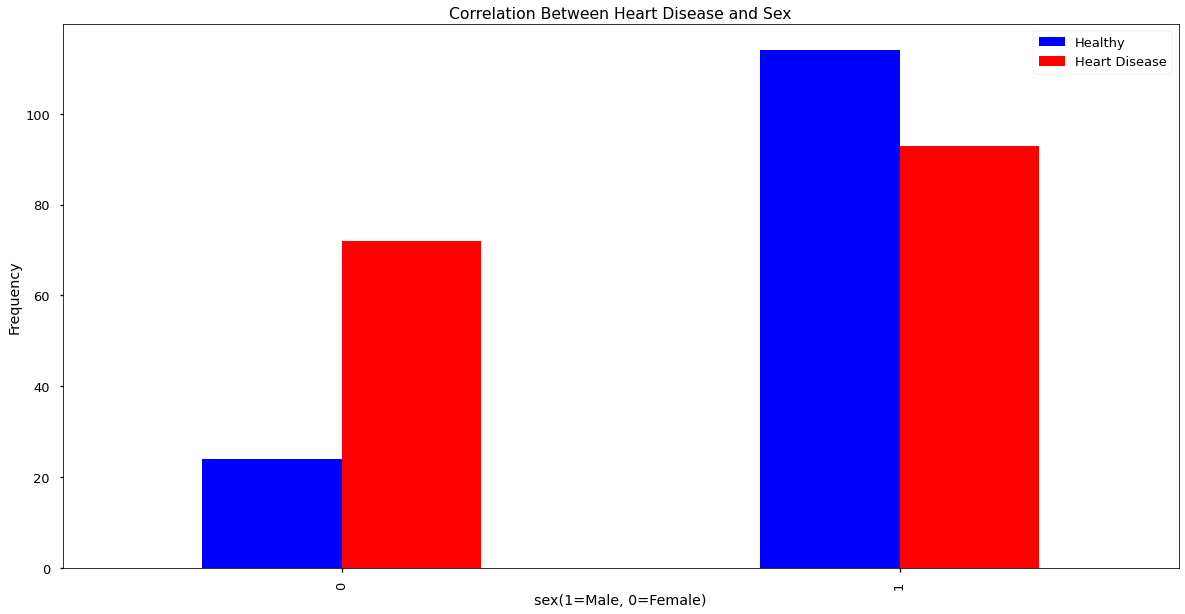

In [12]:
#Correlation between sex & target
#Relationship with numerical variables
#barplot sex/target

pd.crosstab(rawdata.sex,rawdata.target).plot(kind="bar",
figsize=(20,10), color=['blue','red'])
plt.xlabel('sex(1=Male, 0=Female)')
plt.ylabel('Frequency')
plt.legend(['Healthy', 'Heart Disease'])
plt.title('Correlation Between Heart Disease and Sex')

Text(0.5, 1.0, 'Correlation Between Heart Disease and Chest Pain Experience')

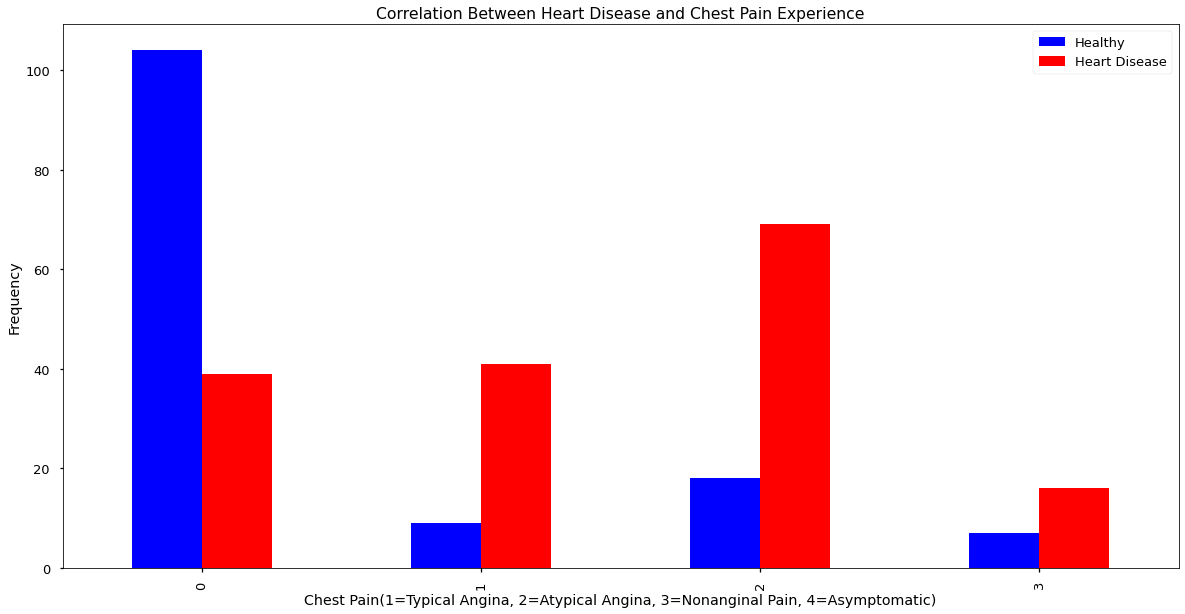

In [13]:
#Correlation between chest pain & target
#Relationship with numerical variables
#barplot Chest Pain/target

pd.crosstab(rawdata.cp,rawdata.target).plot(kind="bar",
figsize=(20,10), color=['blue','red'])
plt.xlabel('Chest Pain(1=Typical Angina, 2=Atypical Angina, 3=Nonanginal Pain, 4=Asymptomatic)')
plt.ylabel('Frequency')
plt.legend(['Healthy', 'Heart Disease'])
plt.title('Correlation Between Heart Disease and Chest Pain Experience')

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


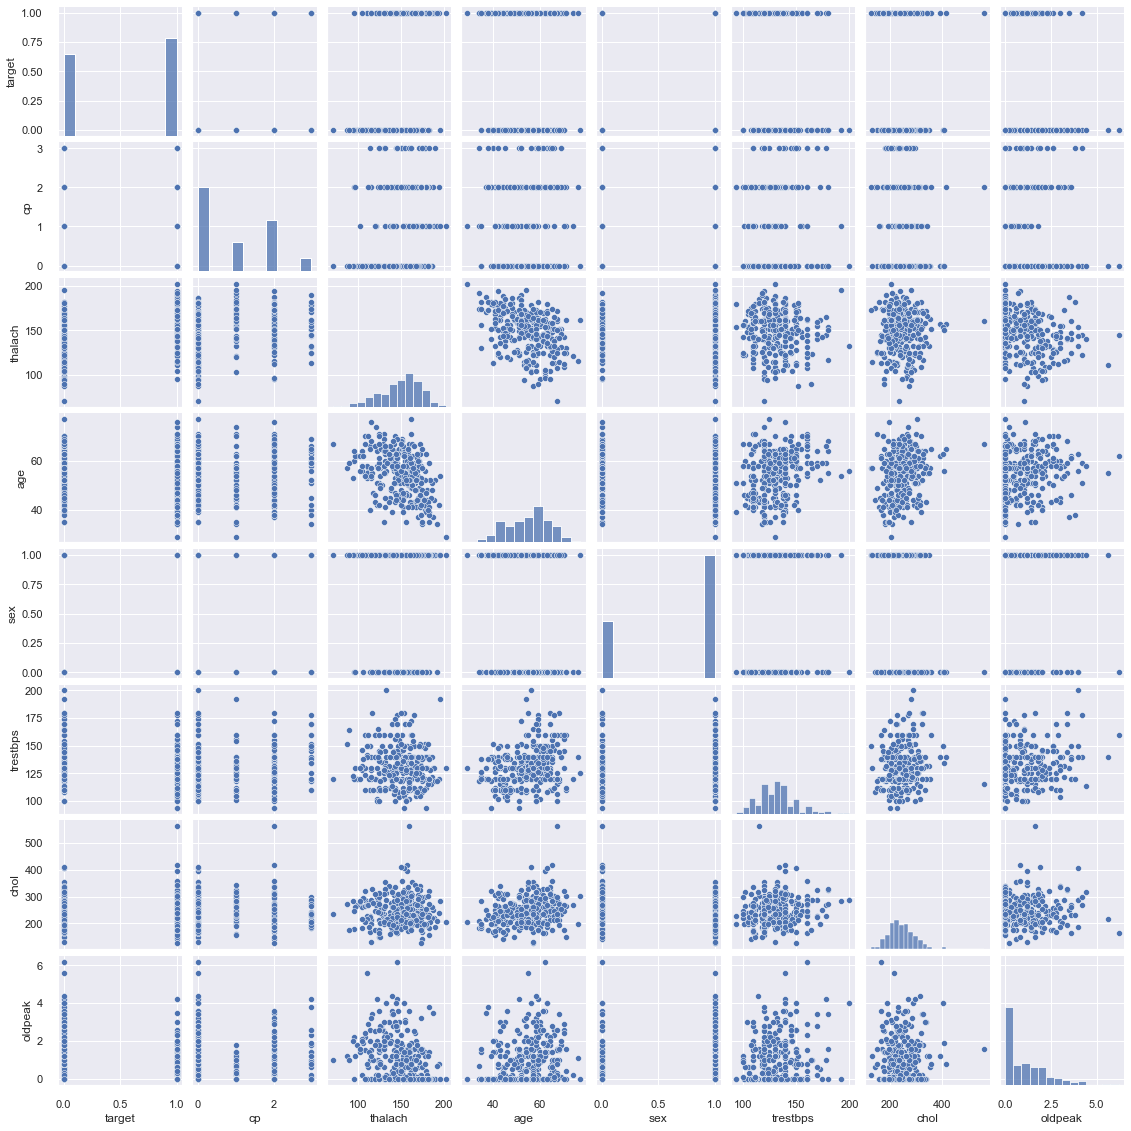

In [14]:
#scatterplot
sns.set()
cols = ['target', 'cp', 'thalach', 'age', 'sex', 'trestbps', 'chol', 
'oldpeak']
sns.pairplot(rawdata[cols], size = 2)
plt.show();

In [15]:
#Preparing the columns/ relabelling the columns
rawdata.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

rawdata.columns
#rawdata.columns =['age','sex','cp','trestbps','chol','fbs','restecg','thalach',
#                 'exang','oldpeak','slope','ca','thal','target']

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [16]:
rawdata.drop(columns=['num_major_vessels'],inplace=True)

In [17]:
#Manually updating the feature values with labels
rawdata['sex'][rawdata['sex'] == 0] = 'female'
rawdata['sex'][rawdata['sex'] == 1] = 'male'

rawdata['chest_pain_type'][rawdata['chest_pain_type'] == 1] = 'typical angina'
rawdata['chest_pain_type'][rawdata['chest_pain_type'] == 2] = 'atypical angina'
rawdata['chest_pain_type'][rawdata['chest_pain_type'] == 3] = 'non-anginal pain'
rawdata['chest_pain_type'][rawdata['chest_pain_type'] == 4] = 'asymptomatic'

rawdata['fasting_blood_sugar'][rawdata['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
rawdata['fasting_blood_sugar'][rawdata['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

rawdata['rest_ecg'][rawdata['rest_ecg'] == 0] = 'normal'
rawdata['rest_ecg'][rawdata['rest_ecg'] == 1] = 'ST-T wave abnormality'
rawdata['rest_ecg'][rawdata['rest_ecg'] == 2] = 'left ventricular hypertrophy'

rawdata['exercise_induced_angina'][rawdata['exercise_induced_angina'] == 0] = 'no'
rawdata['exercise_induced_angina'][rawdata['exercise_induced_angina'] == 1] = 'yes'

rawdata['st_slope'][rawdata['st_slope'] == 1] = 'upsloping'
rawdata['st_slope'][rawdata['st_slope'] == 2] = 'flat'
rawdata['st_slope'][rawdata['st_slope'] == 3] = 'downsloping'

rawdata['thalassemia'][rawdata['thalassemia'] == 3] = 'normal'
rawdata['thalassemia'][rawdata['thalassemia'] == 6] = 'fixed defect'
rawdata['thalassemia'][rawdata['thalassemia'] == 7] = 'reversable defect'

<ipython-input-17-d78b04b56fb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata['sex'][rawdata['sex'] == 0] = 'female'
<ipython-input-17-d78b04b56fb1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata['chest_pain_type'][rawdata['chest_pain_type'] == 1] = 'typical angina'
<ipython-input-17-d78b04b56fb1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata['fasting_blood_sugar'][rawdata['fasting_blood_sugar'] == 0] =

In [18]:
#Preparing the features and splitting the target variable from the dataset

y = rawdata['target']
X = rawdata.drop(['target'], axis = 1)
print("Shape of y:", y.shape)

Shape of y: (303,)


In [19]:
#One-Hot Encoding of the data
# drop_first = True, means dropping the first categories from each of the attribues 
# for ex gender having gender_male and gender-female would be male having values 1 and 0
rawdata = pd.get_dummies(rawdata, drop_first=True)


In [20]:
# checking the shapes of x and y
x = rawdata
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (303, 19)
Shape of y: (303,)


In [21]:
#Splitting the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state=0)


In [22]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)


(212, 2)


In [23]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 12)
(91, 12)
(212,)
(91,)


# Artificial Neural Network Model:

In [24]:
#Creating our deep learning model and the layers

model = Sequential()

#Preparing the input layer and first hidden layer
model.add(Dense(11, kernel_initializer = 'normal', input_shape=(18,)))
model.add(Activation('relu'))


#Preparing the second hidden layer
model.add(Dense(11, kernel_initializer = 'normal'))
model.add(Activation('relu'))

#Preparing the output layer
model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

print("Network architecture is defined!")

print(model.summary())

Network architecture is defined!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                209       
_________________________________________________________________
activation (Activation)      (None, 11)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                132       
_________________________________________________________________
activation_1 (Activation)    (None, 11)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 12        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
#Compiling the model
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

print("model is now ready-to-use")

model is now ready-to-use


In [28]:
#Fittig the model - training data:
train_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, verbose = 1)
print("model is fit!")

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [29]:
#Predicting with the Test set

y_pred = model.predict(X_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [30]:
#Looking for the accuracy of the model

import seaborn as sns
from sklearn.metrics import confusion_matrix

cmAN = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cmAN, annot=True, annot_kws = {'size':12}, cmap="Blues",fmt="d",cbar=False).set(title="Cleveland Dataset: Artificial Neural Network")

#accuracy score
from sklearn.metrics import accuracy_score
#Evaluating the model
accAN = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ", round(accAN*100,2),"%")
# print("Training Accuracy :", logreg.score(x_train, y_train))
# print("Testing Accuracy  :", logreg.score(x_test, y_test))
print("")

acc=accuracy_score(y_test, y_pred.round())

NameError: name 'y_pred' is not defined

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

#Model accuracy

plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

NameError: name 'train_model' is not defined

In [32]:
#Model Loss

plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

NameError: name 'train_model' is not defined

## ANN Receiver Operating Characteristic Curve (ROC):

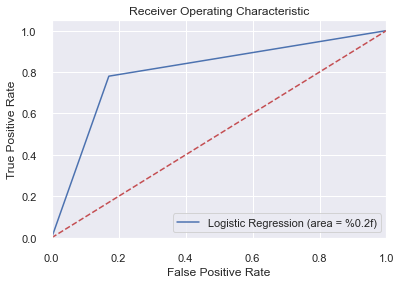

In [161]:
#Observing the performances of the 3 models
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fprANN, tprANN, thresholdsANN = roc_curve(y_test, y_pred.round())

#Plotting the ROC Curve
plt.figure()
plt.plot(fprANN, tprANN, label='Logistic Regression (area = %0.2f)')
plt.title('Receiver Operating Characteristic',fontweight=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.rcParams['figure.figsize'] = (5, 4)
# plt.savefig('Log_ROC')
plt.show()

### AUC Curve:

In [162]:
# AUC Curve for the Linear Regression Model
aucANN = auc(fprANN, tprANN)

print("AUC Score:", round(aucANN*100,2),"%")

AUC Score: 80.46 %


# Random Forest Model:

In [163]:
#Random Forest preparation

modelRF = RandomForestClassifier(n_estimators = 50, max_depth = 5)
modelRF.fit(X_train, y_train)
y_predict = modelRF.predict(X_test)
y_pred_quant = modelRF.predict_proba(X_test)[:, 1]
y_pred = modelRF.predict(X_test)

#Evaluating the model
accRF = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ", round(accRF*100,2),"%")
# print("Training Accuracy :", model.score(x_train, y_train))
# print("Testing Accuracy  :", model.score(x_test, y_test))
print("")

#Confusion matrix
cmRF = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 3)
sns.heatmap(cmRF, annot = True, annot_kws = {'size':12}, cmap = 'Blues').set(title="Cleveland Dataset: Random Forest")

#Classification report
crRF = classification_report(y_test, y_pred)
print(crRF)

ValueError: could not convert string to float: 'male'

In [164]:
#Breakdown of the Precision, Recall, and F-Score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

recallLR = recall_score(y_test, y_pred)
print("Recall is: ",recallLR)

precisionLR = precision_score(y_test, y_pred)
print("Precision is: ",precisionLR)

f1_metricLR = f1_score(y_test, y_pred, average = "macro")
print('F-Score:', f1_metricLR)

Recall is:  0.78
Precision is:  0.8478260869565217
F-Score: 0.8015988372093024


## RF Receiver Operating Characteristic Curve (ROC):

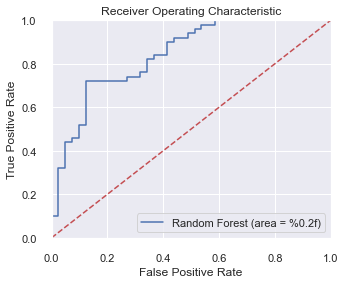

In [165]:
#Observing the performances of the 3 models
fprRF, tprRF, thresholdsANN = roc_curve(y_test, y_pred_quant)

#Plotting the ROC Curve
plt.figure()
plt.plot(fprRF, tprRF, label='Random Forest (area = %0.2f)')
plt.title('Receiver Operating Characteristic',fontweight=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['figure.figsize'] = (5, 4)
# plt.savefig('Log_ROC')
plt.show()

### AUC Curve:

In [166]:
# AUC Curve for the Linear Regression Model
aucRF = auc(fprRF, tprRF)

print("AUC Score:", round(aucRF*100,2),"%")

AUC Score: 84.15 %


# Logistic Regression Model:

In [167]:
#Logistic Regression Model preparation

logreg = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#Evaluating the model
accLR = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ", round(accLR*100,2),"%")
# print("Training Accuracy :", logreg.score(x_train, y_train))
# print("Testing Accuracy  :", logreg.score(x_test, y_test))
print("")

# cofusion matrix
cmLR = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 3)
sns.heatmap(cmLR, annot = True, annot_kws = {'size':12}, cmap = 'Blues').set(title="Cleveland Dataset: Logistic Regression")

# classification report
crLR = classification_report(y_test, y_pred)
print(crLR)

ValueError: could not convert string to float: 'male'

In [168]:
#Breakdown of the Precision, Recall, and F-Score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 

recallLR = recall_score(y_test, y_pred)
print("Recall is: ",recallLR)

precisionLR = precision_score(y_test, y_pred)
print("Precision is: ",precisionLR)

f1_metricLR = f1_score(y_test, y_pred, average = "macro")
print('F-Score:', f1_metricLR)

Recall is:  0.78
Precision is:  0.8478260869565217
F-Score: 0.8015988372093024


## LR Receiver Operating Characteristic Curve (ROC):

In [169]:
#Observing the performances of the 3 models
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fprLR, tprLR, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

#Plotting the ROC Curve
plt.figure()
plt.plot(fprLR, tprLR, label='Logistic Regression (area = %0.2f)')
plt.title('Receiver Operating Characteristic',fontweight=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.rcParams['figure.figsize'] = (5, 4)
# plt.savefig('Log_ROC')
plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### AUC Curve:

In [170]:
# AUC Curve for the Linear Regression Model
aucLR = auc(fprLR, tprLR)

print("AUC Score:", round(aucLR*100,2),"%")

AUC Score: 87.12 %


## ROC Curve for ANN, LR, RF Models:

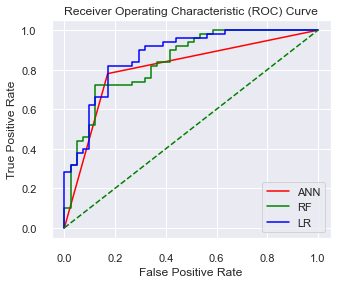

In [171]:
plt.plot(fprANN, tprANN, color='red', label='ANN')
plt.plot(fprRF,tprRF, color='green', label='RF')  
plt.plot(fprLR, tprLR, color='blue', label='LR')


plt.rcParams['figure.figsize'] = (7,6 )
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()